In [2]:
from xgboost import XGBClassifier
import numpy as np
import pandas as pd

In [6]:
df=pd.read_excel('data.xlsx')

In [8]:
df.head()

,subject_id,stay_id,charttime,temperature,heartrate,resprate,o2sat,sbp,dbp,pain-min,...,trans_time,trans,charttimeBP,heartrate.1,sbp.1,dbp.1,Map,Dying,Medicine,Medication
0,10003019,36204964,2120-05-26 22:05:00,98.5,68.0,20.0,98.0,110.0,42.0,0,...,2175-06-26 05:59:00,1,2175-06-25 12:54:00,67.0,134,51,78.666667,0,0,0
1,10003019,34378664,2127-09-07 11:33:00,99.9,80.0,16.0,95.0,173.0,80.0,9,...,NaT,0,2163-12-27 14:48:00,80.0,173,80,111.000000,0,0,0
2,10003019,34378664,2127-09-07 11:55:00,NaN,78.0,18.0,95.0,120.0,56.0,NaN,...,NaT,0,2163-12-27 14:48:00,80.0,173,80,111.000000,0,0,0
3,10003299,32269360,2185-10-09 18:24:00,98.0,69.0,18.0,100.0,118.0,69.0,2,...,NaT,0,2150-06-08 10:06:00,72.0,132,97,108.666667,0,0,0
4,10003299,36642617,2145-08-24 18:35:00,NaN,68.0,16.0,100.0,129.0,84.0,0,...,NaT,0,2180-01-23 18:28:00,72.0,167,103,124.333333,0,0,0


In [9]:
df.shape

(11409, 24)

## 2.提取特征变量和目标变量

In [23]:
X=df.drop(columns=['Medicine','charttime', 'pain-min', 'intime', 'outtime', 'Sex', 'trans_time', 'charttimeBP', 'Medication'])
y=df['Medicine']

## 3. 划分训练集和测试集

In [24]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=123)

## 4. 模型训练及搭建

In [25]:
from xgboost import XGBClassifier
clf=XGBClassifier(n_estimators=100,learning_rate=0.05)
clf.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.05, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

## 模型预测及评估

In [28]:
y_pred=clf.predict(X_test)
a=pd.DataFrame() #创建一个空DataFrame
a['预测值']=list(y_pred)

In [29]:
a['实际值']=list(y_test)

,预测值
0,0
1,0
2,0
3,0
4,0
...,...
2277,0
2278,0
2279,0
2280,0


In [32]:
from sklearn.metrics import accuracy_score
score=accuracy_score(y_pred,y_test)
score

0.9938650306748467

In [31]:
clf.score(X_test,y_test) #clf也有自带的

0.9938650306748467

In [33]:
from sklearn.metrics import roc_curve
y_pred_proba=clf.predict_proba(X_test)
y_pred_proba[:,1] #想看medicine分类为1的概率

array([0.00461108, 0.00673766, 0.00552698, ..., 0.0043621 , 0.01010635,
       0.00498605], dtype=float32)

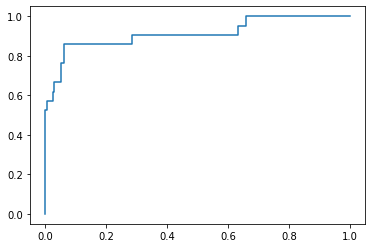

In [35]:
fpr,tpr,thres=roc_curve(y_test,y_pred_proba[:,1])
import matplotlib.pyplot as plt
plt.plot(fpr,tpr)
plt.show()

In [60]:
import seaborn as sn
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
y_test
# cm=confusion_matrix(y_test,y_pred,labels=[0,1,2])

6961     0
2484     0
10267    0
6681     0
5618     0
        ..
9529     0
10262    0
5239     0
5867     0
5296     0
Name: Medicine, Length: 2282, dtype: int64

[[3 2]
 [1 6]]


Text(30.5, 0.5, 'True')

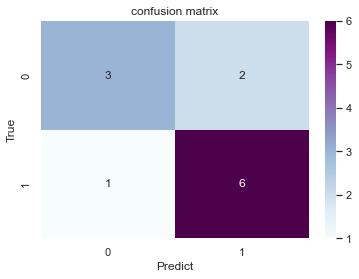

In [75]:
sn.set()
f,ax=plt.subplots()
y_true = [0,0,1,0,1,1,0,1,1,0,1,1]
y_pred = [1,0,1,1,1,0,0,1,1,0,1,1]
C2= confusion_matrix(y_true, y_pred, labels=[0, 1])
print(C2) #打印出来看看
# sn.heatmap(C2,annot=True,ax=ax) #画热力图
sn.heatmap(C2,annot=True,ax=ax, cmap="BuPu") #画热力图
ax.set_title('confusion matrix')
ax.set_xlabel('Predict')
ax.set_ylabel('True')